<a href="https://colab.research.google.com/github/DrR7data/data-science-porfolio/blob/main/explore_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Training a Simple Machine Learning Model (Linear Regression)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Generate some synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("Generated data points:")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Generated data points:
X shape: (100, 1), y shape: (100, 1)


The data `X` is our feature (input), and `y` is our target (output). We'll now split this data into training and testing sets. The model will learn from the training data and then be evaluated on the unseen test data.

In [ ]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(80, 1), y_train=(80, 1)
Testing data shape: X_test=(20, 1), y_test=(20, 1)


Now, let's create a Linear Regression model and train it using our training data.

In [ ]:
# 3. Create a Linear Regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model trained. Coefficients: {model.coef_[0][0]:.2f}, Intercept: {model.intercept_[0]:.2f}")

Model trained. Coefficients: 2.99, Intercept: 4.21


With the model trained, we can now make predictions on the test set and evaluate its performance.

In [ ]:
# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.92
R-squared (R2): 0.65


Finally, let's visualize our data, the true relationship, and the model's predictions.

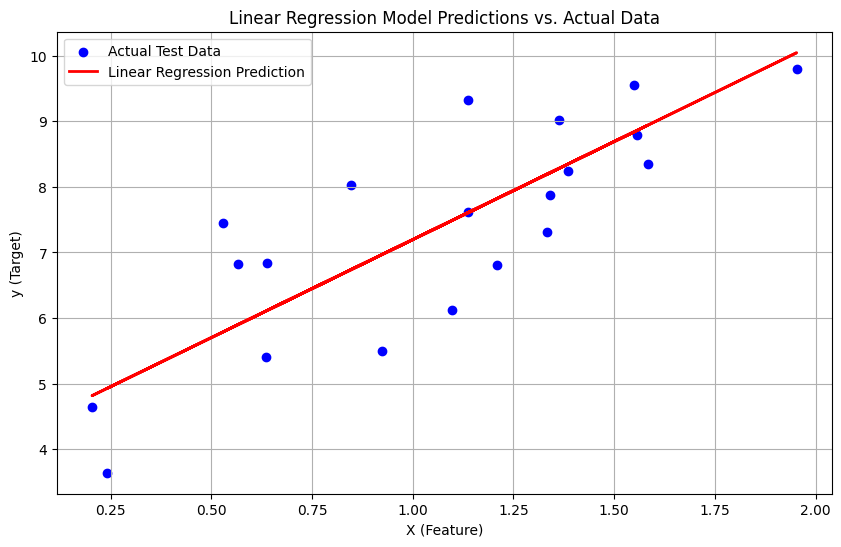

In [ ]:
# 6. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Linear Regression Model Predictions vs. Actual Data')
plt.legend()
plt.grid(True)
plt.show()

### Generating Synthetic Retail Transaction Data

In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters for the synthetic data
num_transactions = 1000
num_products = 50
num_customers = 200

start_date = '2023-01-01'
end_date = '2023-12-31'

# Generate transaction dates
dates = pd.to_datetime(start_date) + pd.to_timedelta(np.random.randint(0, (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days, num_transactions), unit='D')

# Generate product and customer IDs
product_ids = np.random.randint(1000, 1000 + num_products, num_transactions)
customer_ids = np.random.randint(1, 1 + num_customers, num_transactions)

# Generate product categories
product_categories = np.random.choice(['Electronics', 'Apparel', 'Home Goods', 'Books', 'Groceries'], num_transactions)

# Generate unit prices and quantities
unit_prices = np.round(np.random.uniform(5, 500, num_transactions), 2)
quantities = np.random.randint(1, 6, num_transactions)

# Calculate sales amount
sales_amount = np.round(unit_prices * quantities, 2)

# Create the DataFrame
retail_df = pd.DataFrame({
    'transaction_date': dates,
    'customer_id': customer_ids,
    'product_id': product_ids,
    'product_category': product_categories,
    'unit_price': unit_prices,
    'quantity': quantities,
    'sales_amount': sales_amount
})

# Sort by transaction date for better time-series analysis
retail_df = retail_df.sort_values(by='transaction_date').reset_index(drop=True)

print(f"Generated {len(retail_df)} retail transactions.")
display(retail_df.head())
display(retail_df.info())

Generated 1000 retail transactions.


,transaction_date,customer_id,product_id,product_category,unit_price,quantity,sales_amount
0,2023-01-01,65,1024,Home Goods,425.34,4,1701.36
1,2023-01-01,126,1021,Groceries,88.22,5,441.10
2,2023-01-01,192,1044,Electronics,237.30,2,474.60
3,2023-01-01,116,1043,Home Goods,362.35,3,1087.05
4,2023-01-01,51,1031,Electronics,57.99,2,115.98


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  1000 non-null   datetime64[ns]
 1   customer_id       1000 non-null   int64         
 2   product_id        1000 non-null   int64         
 3   product_category  1000 non-null   object        
 4   unit_price        1000 non-null   float64       
 5   quantity          1000 non-null   int64         
 6   sales_amount      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 54.8+ KB


None

### Training a Simple Machine Learning Model (Logistic Regression for Classification)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Generate some synthetic data for binary classification
np.random.seed(1) # Using a different seed for a new dataset
X_clf = 2 * np.random.rand(100, 1) # Feature
y_clf = (X_clf > 1) + (0.2 * np.random.randn(100, 1)) # Binary target with some noise
y_clf = (y_clf > 0.5).astype(int) # Convert to binary (0 or 1)

print("Generated classification data points:")
print(f"X_clf shape: {X_clf.shape}, y_clf shape: {y_clf.shape}")
print(f"Target classes distribution: {np.bincount(y_clf.flatten())}")

Generated classification data points:
X_clf shape: (100, 1), y_clf shape: (100, 1)
Target classes distribution: [50 50]


Similar to before, we'll split this classification data into training and testing sets.

In [ ]:
# 2. Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

print(f"Training data shape: X_train_clf={X_train_clf.shape}, y_train_clf={y_train_clf.shape}")
print(f"Testing data shape: X_test_clf={X_test_clf.shape}, y_test_clf={y_test_clf.shape}")

Training data shape: X_train_clf=(80, 1), y_train_clf=(80, 1)
Testing data shape: X_test_clf=(20, 1), y_test_clf=(20, 1)


Now, we'll create a Logistic Regression model and train it using our training data.

In [ ]:
# 3. Create a Logistic Regression model and train it
# We set solver='liblinear' for small datasets and 'l1' penalty for regularization
model_clf = LogisticRegression(solver='liblinear', random_state=42)
model_clf.fit(X_train_clf, y_train_clf.ravel()) # .ravel() converts y_train_clf to 1D array

print("Logistic Regression model trained.")

Logistic Regression model trained.


With the model trained, we can now make predictions on the test set and evaluate its performance using classification metrics like accuracy and a classification report.

In [ ]:
# 4. Make predictions on the test set
y_pred_clf = model_clf.predict(X_test_clf)

# 5. Evaluate the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.60      1.00      0.75         6

    accuracy                           0.80        20
   macro avg       0.80      0.86      0.79        20
weighted avg       0.88      0.80      0.81        20



Finally, let's visualize the decision boundary of our logistic regression model along with the test data.

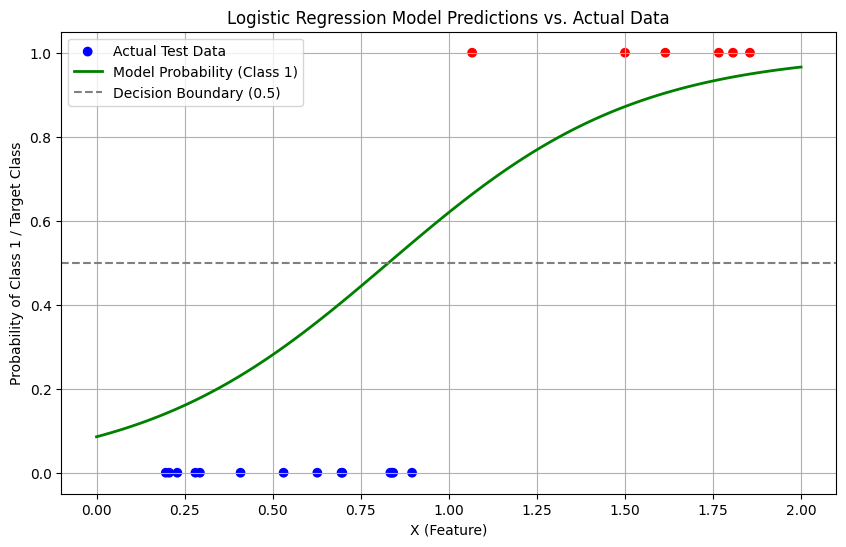

In [ ]:
# 6. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test_clf, y_test_clf, color=['blue' if y == 0 else 'red' for y in y_test_clf.flatten()], label='Actual Test Data')

# Plot the decision boundary
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_proba = model_clf.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Model Probability (Class 1)")
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')

plt.xlabel('X (Feature)')
plt.ylabel('Probability of Class 1 / Target Class')
plt.title('Logistic Regression Model Predictions vs. Actual Data')
plt.legend()
plt.grid(True)
plt.show()